<a href="https://colab.research.google.com/github/DannyNguyen24-Vietnam/Artificial-Intelligence-Course---HCMUTE---Self-Practice---Week-03/blob/main/ARIN_Course_03_SelfPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Requirements:**

**=======================================================================**\
Data Mining of Winter Olympic Medals Record\
**=======================================================================**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data from Website
file_url = 'http://winterolympicsmedals.com/medals.csv'
medaldata = pd.read_csv(file_url)

In [3]:
# Visualization of the first ten values
medaldata.head(10)

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold
5,1924,Chamonix,Biathlon,Biathlon,FIN,military patrol,M,Silver
6,1924,Chamonix,Skating,Figure skating,FIN,pairs,X,Silver
7,1924,Chamonix,Skating,Speed skating,FIN,10000m,M,Gold
8,1924,Chamonix,Skating,Speed skating,FIN,10000m,M,Silver
9,1924,Chamonix,Skating,Speed skating,FIN,1500m,M,Gold


**Uniqueness of Data in Each Category**

In [4]:
print('Years: \n', medaldata['Year'].unique())
print('\n============================================\n')
print('Country Codes: \n', medaldata['NOC'].unique())
print('\n============================================\n')
print('Sport types:\n', medaldata['Sport'].unique())
print('\n============================================\n')
print('Discipline types:\n', medaldata['Discipline'].unique())
print('\n============================================\n')
print('Event types:\n', medaldata['Event'].unique())
print('\n============================================\n')
print('Genders:\n', medaldata['Event gender'].unique())
print('\n============================================\n')
print('Prizes:\n', medaldata['Medal'].unique())

Years: 
 [1924 1928 1932 1936 1948 1952 1956 1960 1964 1968 1972 1976 1980 1984
 1988 1992 1994 1998 2002 2006]


Country Codes: 
 ['AUT' 'BEL' 'CAN' 'FIN' 'FRA' 'GBR' 'NOR' 'SUI' 'SWE' 'USA' 'GER' 'TCH'
 'HUN' 'ITA' 'FRG' 'NED' 'EUA' 'JPN' 'POL' 'URS' 'PRK' 'GDR' 'ROU' 'ESP'
 'LIE' 'BUL' 'YUG' 'CHN' 'EUN' 'KOR' 'LUX' 'NZL' 'AUS' 'BLR' 'KAZ' 'RUS'
 'SLO' 'UKR' 'UZB' 'CZE' 'DEN' 'CRO' 'EST' 'LAT' 'SVK']


Sport types:
 ['Skating' 'Bobsleigh' 'Ice Hockey' 'Biathlon' 'Skiing' 'Curling' 'Luge']


Discipline types:
 ['Figure skating' 'Bobsleigh' 'Ice Hockey' 'Biathlon' 'Speed skating'
 'Cross Country S' 'Curling' 'Nordic Combined' 'Ski Jumping' 'Skeleton'
 'Alpine Skiing' 'Luge' 'Short Track S.' 'Freestyle Ski.' 'Snowboard']


Event types:
 ['individual' 'pairs' 'four-man' 'ice hockey' 'military patrol' '10000m'
 '1500m' '5000m' '500m' 'combined (4 events)' '18km' 'curling' '50km'
 'K90 individual (70m)' 'five-man' 'two-man' '4x10km relay'
 'alpine combined' 'downhill' 'slalom' 'giant slalo

**Medals of Each Country Through Years**

In [133]:
def yearsMedal(cntry_code, cntry_name, medal_type, dataframe, bar_color):

  '''
    Note: Remember to input the correct inputs of medal type, country code and dataframe
    or the program will get jammed
  '''

  # Find the years uniqueness
  cntry_data  = dataframe[(dataframe['NOC'] == cntry_code)&(dataframe['Medal'] == medal_type)]
  num_years   = dataframe['Year'].unique().size
  year_lst    = list(medaldata['Year'].unique())
  year_medal  = [0]*num_years

  # Start scanning through years
  for id, row in cntry_data.iterrows():
    for years in year_lst:
      if row['Year'] == years:
        lst_id = year_lst.index(years)
        year_medal[lst_id] += 1
      else:
        continue

  # Plotting the histogram of medal
  plt.bar(year_lst, year_medal, width = 1.5, align = 'center', color = bar_color)
    
  # Giving title to the plot
  title_str = "{medal_type} Medals of {country} Through Years"
  plt.title(title_str.format(medal_type = medal_type, country = cntry_name))
    
  # Giving X and Y labels
  plt.xlabel("Years")
  y_label ="Number of {medal_type} Medals"
  y_label = y_label.format(medal_type = medal_type)
  plt.ylabel(y_label)
  plt.show()
  
  return year_lst, year_medal

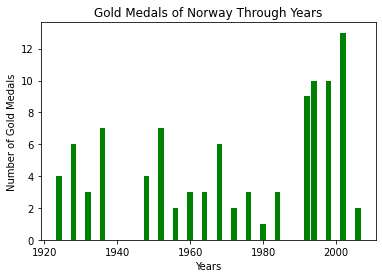

In [130]:
year_lst, year_medal = yearsMedal('NOR', 'Norway', 'Gold', medaldata, 'green')

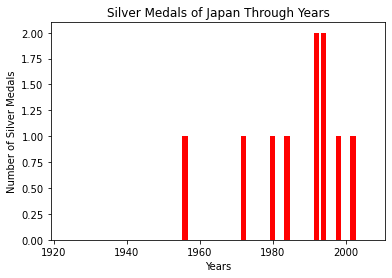

In [131]:
year_lst, year_medal = yearsMedal('JPN', 'Japan', 'Silver', medaldata, 'red')

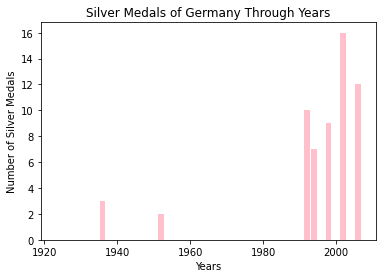

In [132]:
year_lst, year_medal = yearsMedal('GER', 'Germany', 'Silver', medaldata, 'pink')

**Gender of Competitors of Each Country Through Years**

In [163]:
def yearsGender(cntry_code, cntry_name, gender_code, dataframe, bar_color):

  '''
    Note: 
    1. Remember to input the correct inputs of medal type, country code and dataframe
    or the program will get jammed
    2. There are no racism and sexism in this program. This function is used only for
    visualization of the data
  '''

  # Find the years uniqueness
  cntry_data  = dataframe[(dataframe['NOC'] == cntry_code)&(dataframe['Event gender'] == gender_code)]
  num_years   = dataframe['Year'].unique().size
  year_lst    = list(medaldata['Year'].unique())
  year_gend   = [0]*num_years

  # Start scanning through years
  for id, row in cntry_data.iterrows():
    for years in year_lst:
      if row['Year'] == years:
        lst_id = year_lst.index(years)
        year_gend[lst_id] += 1
      else:
        continue

  # Plotting the histogram of medal
  plt.bar(year_lst, year_gend, width = 1.5, align = 'center', color = bar_color)
    
  # Giving title to the plot
  title_str = "Number of {country} {gend} Competitors Through Years"

  if gender_code == 'M':

    gender = 'Male'
  elif gender_code == 'W':
    
    gender = 'Female'
  else:

    gender = 'Pairs'
    
  title_str = title_str.format(country = cntry_name, gend = gender)
  plt.title(title_str)
    
  # Giving X and Y labels
  plt.xlabel("Years")
  y_label ="Number of {gend} Competitors"
  y_label = y_label.format(gend = gender)
  plt.ylabel(y_label)
  plt.show()
  
  return year_lst, year_medal

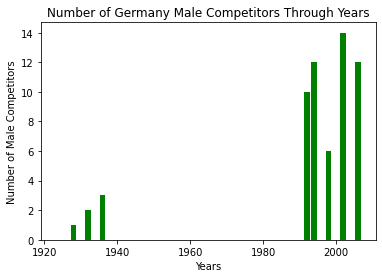

In [165]:
year_lst, year_gend = yearsGender('GER', 'Germany', 'M', medaldata, 'green')

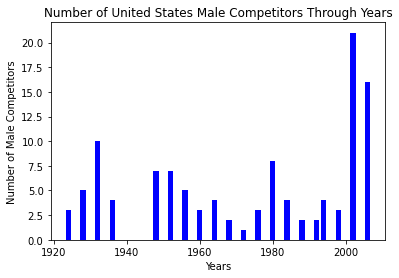

In [155]:
year_lst, year_gend = yearsGender('USA', 'United States', 'M', medaldata, 'blue')

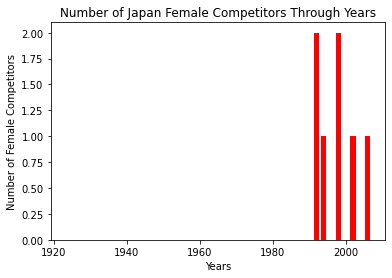

In [157]:
year_lst, year_gend = yearsGender('JPN', 'Japan', 'W', medaldata, 'red')

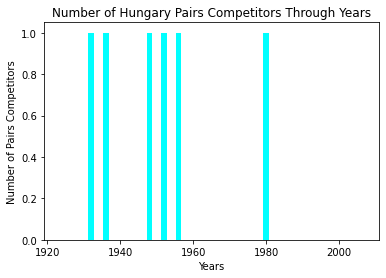

In [167]:
year_lst, year_gend = yearsGender('HUN', 'Hungary', 'X', medaldata, 'cyan')